# Projet Numérique

Les équations de Lotka-Volterra, ou "modèle proie-prédateur", sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun.  Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s'écrivent de la manière suivante :
$$
\left\{ \begin{matrix}
\dot{x}_1 &= x_1(\alpha -\beta x_2) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1)
\end{matrix} \right.
$$
où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

In [3]:
# Matplotlib
import numpy as np
from numpy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

from pylab import streamplot

from IPython.display import display

## Question 1
Donner une interprétation physique à chaque terme de la dynamique. 
Montrer qu'il existe deux points d'équilibre $(0,0)$ et $\bar{x}\in \mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$. Que peut-on dire de leur stabilité à ce stade ?

En l’absence de prédateur, les proies se reproduisent à un taux constant : $\frac{\dot{x_{1}}}{x_{1}} = \alpha $. Mais les prédateurs mangent les proies. En supposant que le taux de prédation (le taux de décroissance des proies en raison des prédateurs) est proportionnel au nombre de prédateurs (plus il y a de prédateurs, plus il y a de proies qui sont mangées), on obtient 
$\frac{\dot{x_{1}}}{x_{1}} = \alpha - \beta x_{2}$

En l’absence de proie donc de nourriture, les prédateurs ont tendance à mourir. On suppose
que le taux de décès est constant : $\frac{\dot{x_{2}}}{x_{2}} =  -\gamma$. De plus, les prédateurs se reproduisent. En supposant que le taux de reproduction est proportionnel au nombre de proies (plus il y a de la nourriture disponibles, plus les prédateurs se reproduisent), on obtient 
$\frac{\dot{x_{2}}}{x_{2}} =  - \gamma + \delta  x_{1}$

Soit $x = (x_{1},x_{2})$ un point d'équilibre, alors : 
\begin{equation}
\left\{\begin{matrix}
x_{1} (\alpha  -\beta   x_{2}) = 0 \\ -x_{2} (\gamma - \delta  x_{1}) = 0
\end{matrix}\right.  
\end{equation}
Donc on trouve deux points d'équilibre : $x_{0} = (0,0)$ ou $\bar{x} = (\frac{\gamma }{\delta }, \frac{\alpha }{\beta })$
Posons $f:(x_{1}, x_{2})  \mapsto (x_{1}(\alpha -\beta x_{2}), -x_{2}(\gamma -\delta x_{1}))$, on a :
\begin{equation}
J_{f}(x_{0}) = \begin{pmatrix}
\alpha  & 0\\ 
0 & -\gamma 
\end{pmatrix}
\end{equation}
de valeurs propres $-\gamma < 0$ et $\alpha > 0$
\begin{equation}
J_{f}(\bar{x}) = \begin{pmatrix}
0  & -\frac{\beta \gamma }{\delta }\\ 
\frac{\beta \gamma }{\delta } & 0 
\end{pmatrix}
\end{equation}
de valeurs propres $-i\frac{\beta \gamma }{\delta }$ et $i\frac{\beta \gamma }{\delta }$. Elles sont toutes de partie réelle nulle.

En conséquence, $x_{0}$ est instable mais on ne peut pas déduire de la stabilités de $\bar{x}$ maintenant.

## Question 2
À l'aide des fonctions `meshgrid` et `quiver`, visualiser graphiquement le champ de vecteurs. 
Intuiter le comportement des solutions. 
On pourra aussi utiliser `streamplot` pour visualiser le portrait de phase.

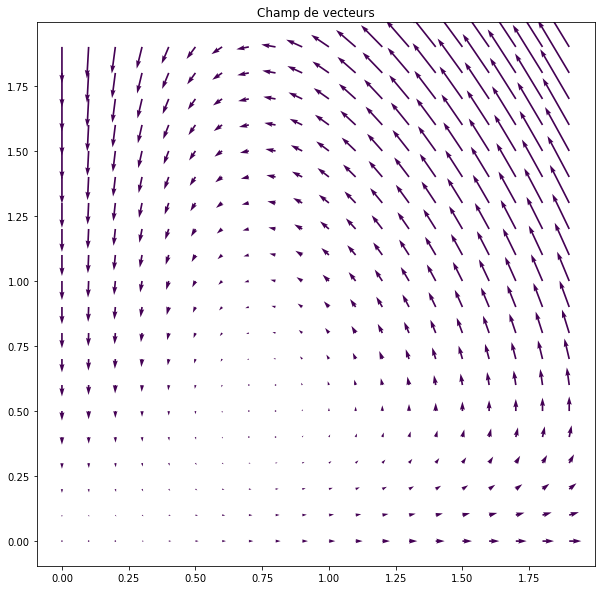

In [4]:

a,b,c,d = 1.0,2.0,3.0,4.0   #on fixe alpha = 1.0, beta = 2.0, gamma = 3.0 et delta = 4.0 pour visualiser le champ de vecteurs 

X, Y = np.meshgrid(np.arange(0, 2, .1), np.arange(0, 2, .1))
U = X * (a - b*Y)
V = -Y*(c - d*X)

plt.figure()
plt.title("Champ de vecteurs")
Q = plt.quiver(X, Y, U, V,1)

plt.show()

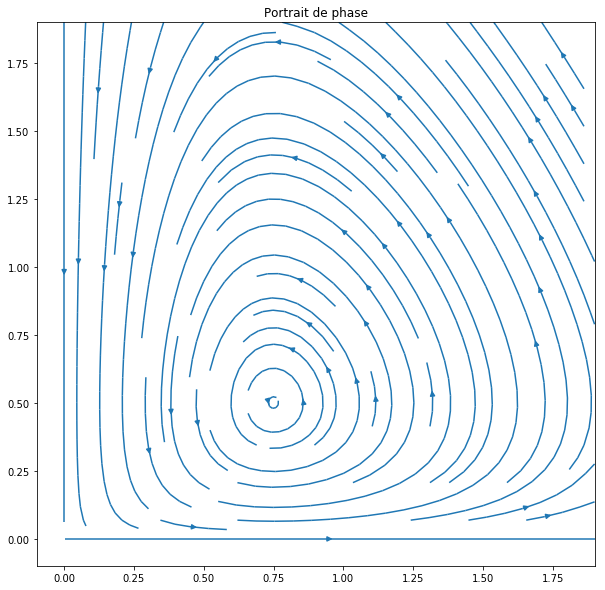

In [5]:
streamplot(X,Y,U,V)
plt.title("Portrait de phase")
plt.show()

Selon ces graphes, on trouve que les solutions avec des conditions initiales dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ restent toujours dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ et se comportent de façon périodique autour du point d'équilibre $\bar{x}$.

## Question 3
Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans  $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ reste dans $\mathbb{R}_{> 0}\times\mathbb{R}_{> 0}$ sur son ensemble de définition.

$f$ est de classe $C^{1}$, dont continûment différentiable par rapport à $x$, d'après le théorème de Cauchy-Lipschitz, pour tout $x_{0} \in \mathbb{R}^{2}$, il existe une unique solution maximale. Soit un problème de Cauchy avec $x_{0} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$, supposons par l'absurde que la solution sorte de $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$, alors par la continuité de la solution, il existe $x$ tel que $x = (0, x_{20})$ ou $x = (x_{10}, 0)$. Supposons qu'il existe $x$ tel que $x = (0, x_{20})$ (la démonstration pour l'autre cas est la même), on trouve que $x(t) = (0, x_{20}$exp$(-\gamma t))$ est aussi une solution maximale du problème de Cauchy:
\begin{equation}
\left\{\begin{matrix}
\dot{x} = f(t,x)\\ x(t=0) = (0, x_{20})
\end{matrix}\right.
\end{equation}

Donc pour ce problème de Cauchy, on a trouvé deux solutions maximales différentes, ABSURDE avec l'unicité de solution maximale.

## Question 4
On considère la fonction
$$
H(x_1,x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2  
$$
définie sur $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$.
Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$ est définie sur $\mathbb{R}$.

Avec $\triangledown H(x(t)) = (\delta - \frac{\gamma }{x_{1}}, \beta - \frac{\alpha }{x_{2}})$ et $f(x(t)) = (x_{1}(\alpha -\beta x_{2}), -x_{2}(\gamma -\delta x_{1}))$, alors 
\begin{split}
\frac{d}{dt} H(x(t)) &= <\triangledown H(x(t)),f(x(t))> \\
&= \delta x_{1}(\alpha -\beta x_{2}) - \gamma (\alpha -\beta x_{2}) - \beta x_{2}(\gamma - \beta x_{1}) + \alpha (\gamma - \beta x_{1}) \\
&= 0
\end{split}

Donc $H$ est conservée le long des trajectoires. De plus, $lim_{\left \| x \right \|\rightarrow \infty }H(x) = +\infty $, ce qui se traduit par le fait que toute solution maximale initialisée dans $\mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$ est bornée et donc définie pour tout $t\in \mathbb{R}$.

## Question 5
Représenter les courbes de niveau de $H$. Où se trouve $\bar{x}$ ? Qu'en conclue-t-on sur le comportement des solutions ? En déduire (graphiquement) que $\bar{x}$ est stable, au sens de la définition de stabilité.

In [6]:
def H(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 4.0 * x1 - 3.0 * np.log(x1) + 2.0 * x2 - 1.0 * np.log(x2)

In [7]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    plt.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.scatter(0.75, 0.5, color="red")   #le point d'équilibre x bar est en rouge
    plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


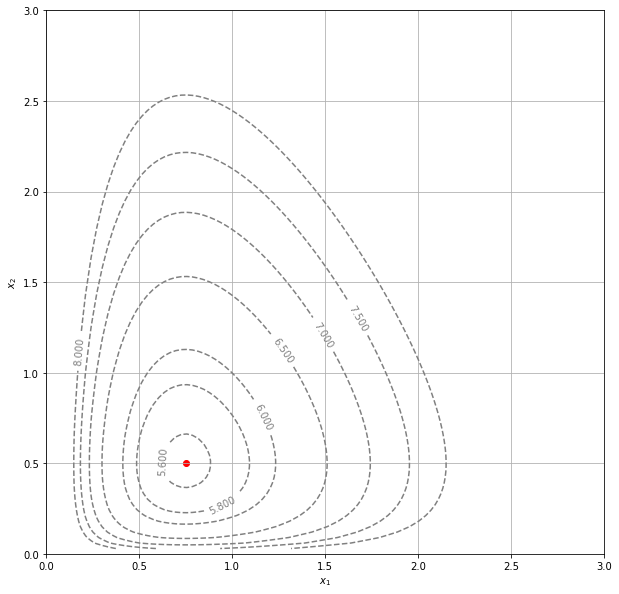

In [8]:
display_contour(
    H, 
    x=np.linspace(0.0, 3.0, 100), 
    y=np.linspace(0.0, 3.0, 100), 
    levels=[5.6,5.8,6.0,6.5,7.0,7.5,8.0] 
)

On constate que la fonction $H$ admet un minimum strict en $\bar{x}$. De plus, $\forall x \in \mathbb{R}_{> 0}\times \mathbb{R}_{> 0}, \frac{d}{dt} H(x(t)) = <\triangledown H(x(t)),f(x(t))> = 0$. Donc $H$ est la fonction de Lyapunov et on en déduit que $\bar{x}$ est stable.

## Question 6
Coder une fonction du type :

def solve_euler_explicit(f, x0, dt, t0, tf):
...

return t, x

prenant en entrée une fonction $f:\mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(t,x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l'ordre de convergence ?

In [9]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    T, X = [t0], [x0]
    while T[-1] < tf:
        t, x = T[-1], X[-1]
        T = np.concatenate((T, np.array([t+dt])))
        X = np.concatenate((X, np.array([x + dt*f(t,x)])))
    return (T, X)

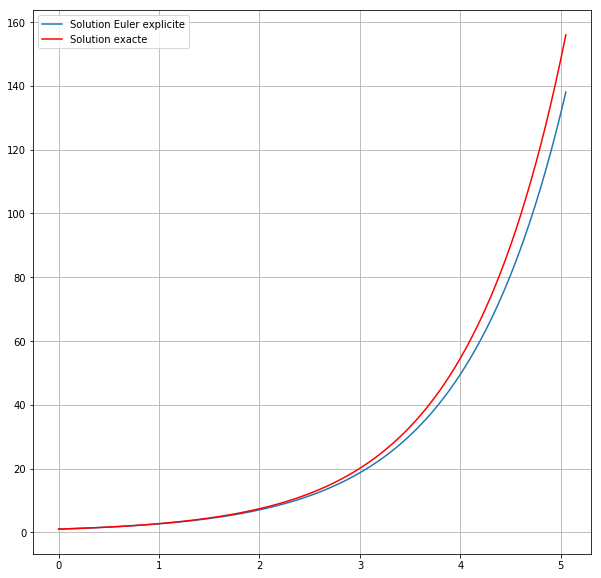

In [10]:
g = lambda t, x : x
T, X = solve_euler_explicit(g, 1, 0.05, 0, 5)
plt.plot(T, X, label="Solution Euler explicite")
plt.plot(T, np.exp(T), 'r', label="Solution exacte")
plt.legend()
plt.grid()
plt.show()

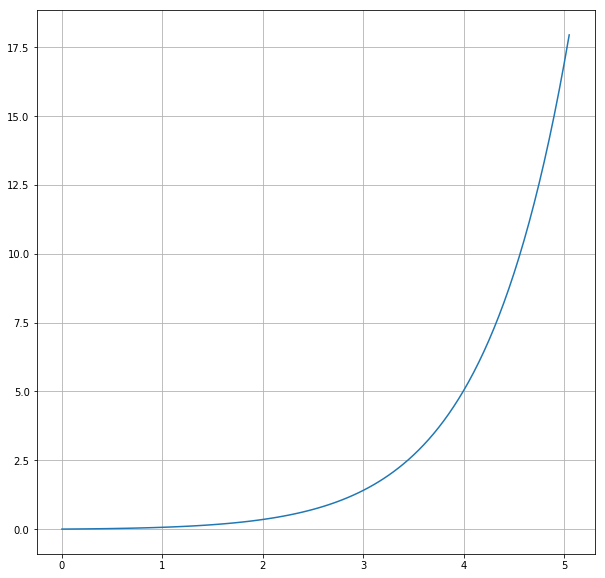

In [11]:
#Visualisation de l'erreur absolue
plt.plot(T, np.abs(X - np.exp(T)))
plt.grid()
plt.show()

Pour visualiser l'ordre de convergence, l'idée est de tracer le logarithme de l'erreur absolue.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


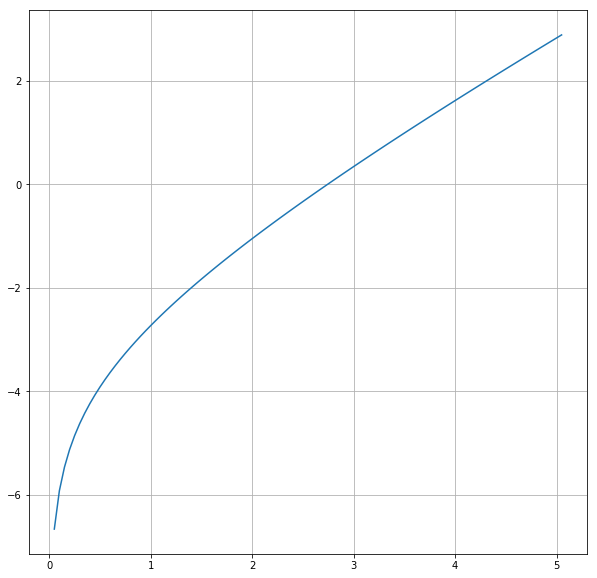

In [12]:
plt.plot(T, np.log(np.abs(X - np.exp(T))))
plt.grid()
plt.show()

On remarque que le logarithme de l'erreur est une droite. Donc l'ordre de convergence de cette méthode pour notre exemple $\dot{x} = x$ est 1.

## Question 7
Utiliser le schéma d'Euler explicite pour simuler les équations de Lotka-Volterra.
Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ?
On pourra tracer l'évolution de la fonction $H$.

In [13]:
def f(t, x):
    x1, x2 = x
    return np.array([x1 * ((2/3) - (4/3) * x2), -x2 * (1 - x1)])

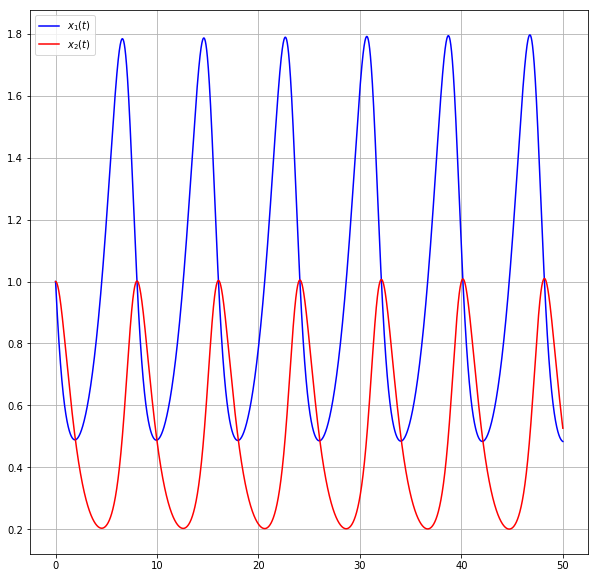

In [14]:
T, X = solve_euler_explicit(f, (1, 1), 1e-3, 0, 50)
X1, X2 = X[:,0], X[:,1]
plt.plot(T, X1, 'b', label="$x_1(t)$") # 1ère composante
plt.plot(T, X2, 'r', label="$x_2(t)$") # 2ème composante
plt.legend()
plt.grid()
plt.show()

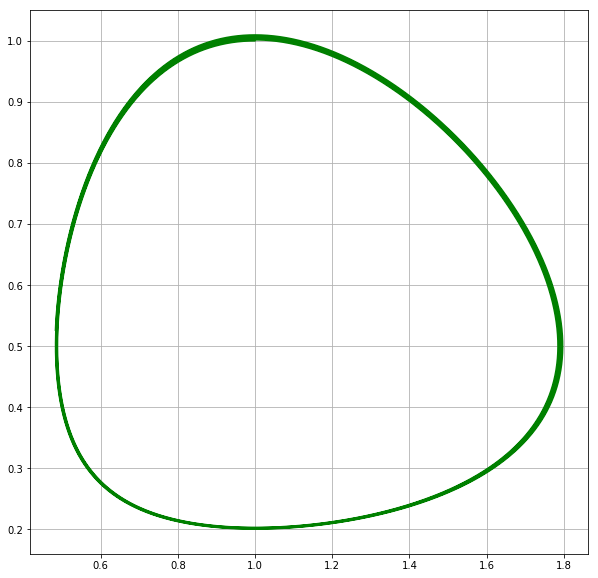

In [15]:
plt.plot(X1, X2, 'g') #portrait de phase
plt.grid()
plt.show()

In [16]:
def H(x1, x2):
    return x1 - np.log(x1) + (4/3)*x2 - (2/3)*np.log(x2)

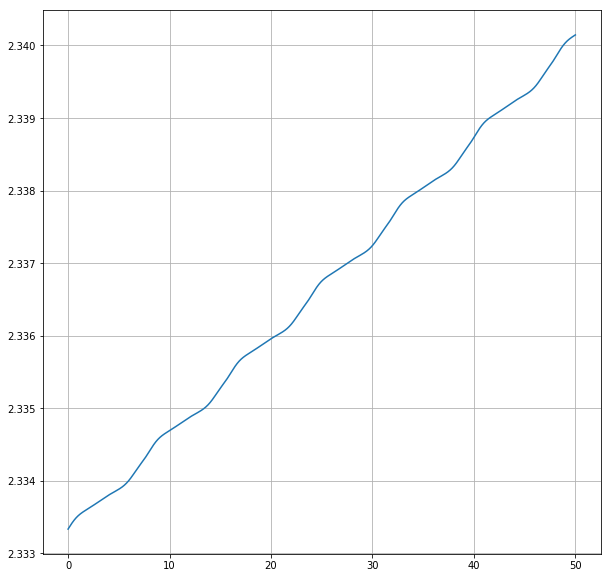

In [17]:
plt.plot(T, H(X1, X2))
plt.grid()
plt.show()

On remarque que la quantité H ne reste pas constante, mais ses variations sont assez faibles. Ceci n'est pas étonnant puisque nous n'avons fait qu'approximer les solutions des équations de Lotka Volterra. A noter que plus on augmente la précision du schéma d'Euler, c'est-à-dire plus petit est le pas de temps dt, plus les variations de H diminuent.

## Question 8
Coder maintenant une fonction du type :

def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
...

return t, x

donnant la solution d’un schéma d’Euler implicite appliqué à x˙ = f(t, x)
selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les
équations de Lotka-Volterra ?

In [18]:
#On a implémenté la méthode d'Euler implicite donnée dans le poly
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    T, X = [t0], [x0]
    while T[-1] < tf:
        t_next = T[-1] + dt
        T = np.concatenate((T, np.array([t_next])))
        x_kp1 = X[-1] + dt * f(T[-2], X[-1])
        for i in range(itermax): #Algorithme du point fixe
            x_k = x_kp1
            x_kp1 = X[-1] + dt * f(T[-1], x_k)
        X = np.concatenate((X, np.array([x_kp1])))
    return T, X

On propose maintenant de modifier ces schémas de façon à stabiliser $H$ et assurer sa conservation le long des solutions numériques.

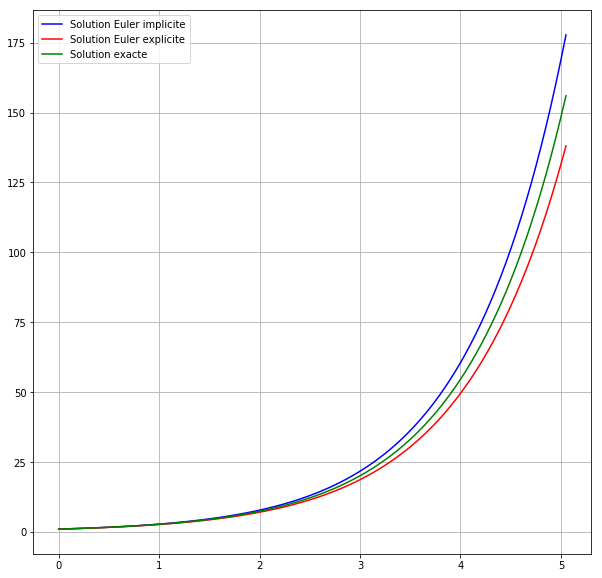

In [19]:
g = lambda t, x : x
T, X = solve_euler_implicit(g, 1, 0.05, 0, 5)
T2, X2 = solve_euler_explicit(g, 1, 0.05, 0, 5)
plt.plot(T, X, 'b', label="Solution Euler implicite")
plt.plot(T2, X2, 'r', label="Solution Euler explicite")
plt.plot(T, np.exp(T), 'g', label="Solution exacte")
plt.legend()
plt.grid()
plt.show()

On remarque que la solution par la méthode d'Euler explicite est une approximation par défaut de la solution exacte, alors que la solution par la méthode d'Euler explicite en est une approximation par excès.

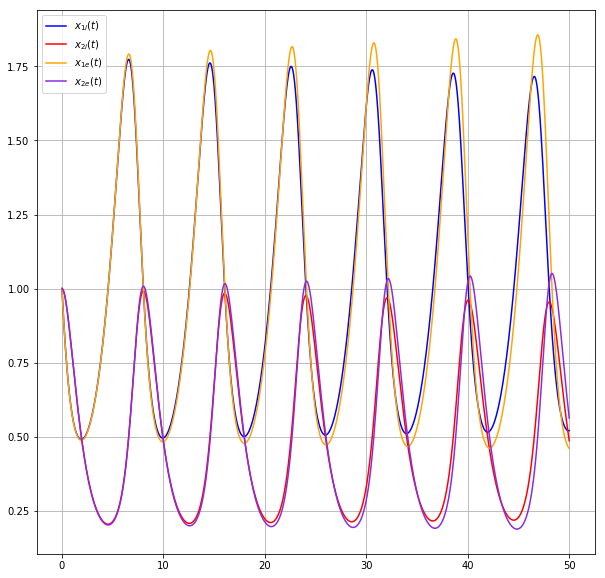

In [20]:
Ti, Xi = solve_euler_implicit(f, (1, 1), 0.005, 0, 50)
Te, Xe = solve_euler_explicit(f, (1, 1), 0.005, 0, 50)
X1i, X2i = Xi[:,0], Xi[:,1]
X1e, X2e = Xe[:,0], Xe[:,1]
plt.plot(Ti, X1i, 'blue', label="$x_{1i}(t)$") 
plt.plot(Ti, X2i, 'red', label="$x_{2i}(t)$")
plt.plot(Te, X1e, 'orange', label="$x_{1e}(t)$")
plt.plot(Te, X2e, 'blueviolet', label="$x_{2e}(t)$")
plt.legend()
plt.grid()
plt.show()

## Question 9
Expliquer pourquoi les solutions de
$$
\left\{ \begin{matrix}
\dot{x}_1 &= x_1(\alpha -\beta x_2) - u_1(x_1,x_2) (H(x_1,x_2)-H_0) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1) - u_2(x_1,x_2) (H(x_1,x_2)-H_0) 
\end{matrix} \right.
$$

sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u:\mathbb{R}^2 \to \mathbb{R}^2$ continûment différentiable.

Soit $u:\mathbb{R}^2 \to \mathbb{R}^2$ continûment différentiable. Posons $g: (x_{1},x_{2})\mapsto (x_1(\alpha -\beta x_2) - u_1(x_1,x_2) (H(x_1,x_2)-H_0), -x_2(\gamma - \delta x_1) - u_2(x_1,x_2) (H(x_1,x_2)-H_0))$. Soit $x_{0} \in \mathbb{R}_{> 0}\times \mathbb{R}_{> 0}$

On note:
\begin{equation}
\left\{\begin{matrix}
\dot{x} = f(t,x)\\ x(t=0) = x_{0}
\end{matrix}\right.
\end{equation}
le problème de Cauchy $C_{1}$ de solution maximale unique $x_{C_{1}}(t)$ et
\begin{equation}
\left\{\begin{matrix}
\dot{x} = g(t,x)\\ x(t=0) = x_{0}
\end{matrix}\right.
\end{equation}
le problème de Cauchy $C_{2}$ de solution maximale unique $x_{C_{2}}(t)$.

Maintenant, posons:
\begin{equation}
\left\{\begin{matrix}
\dot{x} = f(t,x)-g(t,x)\\ x(t=0) = (0,0)
\end{matrix}\right.
\end{equation}
un nouveau problème de Cauchy $C$. Comme $u$ est continûment différentiable, $f-g$ l'est et encore d'après le théorème de Cauchy-Lipschitz, il existe une unique solution maximale. On vérifie que $x_{C_{1}}(t)-x_{C_{2}}(t)=(0,0) $ est bien cette unique solution: $\dot{x_{C_{1}}} - \dot{x_{C_{2}}} = f(t, x_{C_{1}}-x_{C_{2}}) - g(t, x_{C_{1}}-x_{C_{2}})$ et $f(t,(0,0))-g(t,(0,0)) = (0,0)$ et $x_{C_{1}}(t=0) - x_{C_{2}}(t=0) = (0,0)$.

Finalement, les solutions sont identiques.

## Question 10
Soit $H_0\in \mathbb{R}$. Calculer la dérivée de $H-H_0$ le long des solutions de ce nouveau système. Montrer que l'on peut choisir $u$ tel que
$$
\frac{d }{dt} (H(x(t))-H_0) = -k \| \nabla H(x(t)) \|^2 (H(x(t))-H_0) \ .
$$ 
En déduire qu'alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini si $x$ reste à une distance strictement positive de $\bar{x}$.

On a
\begin{split}
\frac{d}{dt} (H(x(t))-H_{0}) &= <\triangledown (H(x(t))-H_{0}),g(x(t))> \\
&= -(H(x_{1},x_{2})-H_{0})\cdot (u_{1}(x_{1},x_{2})(\delta - \frac{\gamma }{x_{1}}) + u_{2}(x_{1},x_{2})(\beta - \frac{\alpha }{x_{2}}))
\end{split}

Donc en posant $u(x_{1},x_{2}) \mapsto (k(\delta - \frac{\gamma }{x_{1}}), k(\beta - \frac{\alpha }{x_{2}}))$, on a:
$$
\frac{d }{dt} (H(x(t))-H_0) = -k \| \nabla H(x(t)) \|^2 (H(x(t))-H_0) \ .
$$ 

Si $x$ reste à une distance strictement positive $L$ de $\bar{x}$, alors
\begin{split}
\left \| x-\bar{x} \right \|^{2} &= (x_{1}-\frac{\gamma }{\delta })^{2} + (x_{2}-\frac{\alpha }{\beta })^{2} \\
&= \frac{x_{1}^{2}}{\delta ^{2}}(\delta -\frac{\gamma }{x_{1}})^{2}+\frac{x_{2}^{2}}{\beta ^{2}}(\beta -\frac{\alpha }{x_{2}})^{2}\\
&\geq  L^{2}
\end{split}
De plus, $\left \| x \right \|$ admet une borne inférieure , donc $\exists M > 0$ tel que $max(\frac{x_{1}^{2}}{\delta ^{2}}, \frac{x_{2}^{2}}{\beta ^{2}}) = M$, donc:
\begin{equation}
\left \| x-\bar{x} \right \|^{2} \leq M(\delta -\frac{\gamma }{x_{1}})^{2} + M(\beta -\frac{\alpha }{x_{2}})^{2} \leq M\| \nabla H(x(t)) \|^2
\end{equation}
Donc finalement
\begin{equation}
\| \nabla H(x(t)) \|^2 \geq \frac{L^{2}}{M}> 0
\end{equation}
Et
\begin{equation}
\frac{d }{dt} (H(x(t))-H_0) \leq -k\frac{L^{2}}{M} (H(x(t))-H_0) \
\end{equation}
Alors $H(x(t))-H_0 \leq e^{-k\frac{L^{2}}{M}t}\xrightarrow[t\rightarrow \infty ]{}0$, ce qui prouve que $H(x(t))-H_0$ est bornée par une exponentielle décroissante.

## Question 11
En déduire comment modifier l'implémentation du schéma d'Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ?

On pourrait, pour assurer la stabilité de H, adapter le pas dt à chaque itération par la relation suivante :
$$
\Delta t_{new} = \Delta t_{j} \sqrt{\frac{T_{abs}}{\left \| e^{j+1} \right \|}}
$$

* Lorsque l'erreur est trop grande, on réduit le pas de temps, 
* Lorsqu'elle est trop faible par rapport à la tolérance imposée, et qu'on risque une propagation d'erreurs d'arrondis trop importante, on augmente le pas de temps.  



In [21]:
def solve_ivp_euler_explicit_variable_step(f, x0, t0, t_f, dtmin = 1e-16, dtmax = 0.001, atol = 1e-6):
    """On calcule à des intervalles optimisés les valeurs de la solution pour assurer la convergence 
    en appliquant la méthode d'Euleur explicite, et, en appliquant la stratégie décrite plus haut: 
    on vérifie à chaque étape que l'erreur reste inférieure à la tolérance voulue, 
    on adapte le pas de temps à la valeur de l'erreur, mais on ne garde que les valeurs à chaque dtmax (souci de mémoire)"""
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(t, x)
            x_back = x_next - dt * f(t_next, x_next) # x_back sert à calculer l'erreur e_{j+1} 
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * np.sqrt(ratio_abs_error) # On adapte le pas de temps en se gardant une marge de sécurité (0.9)
            # Puis on s'assure que le pas de temps reste toujours compris entre dtmin et dtmax:
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2 
            t, ti, x = t_next, ti_next, x_next
        # Quand ti atteint dtmax, on y revient avec dt2D qui est négatif
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(t, x)
        # On ne conserve que les dernières valeurs calculées
        ts = np.vstack([ts,t_next])  
        xs = np.vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs)

Le rôle de k est de contrôler la vitesse de décroissance de l'exponentielle, donc si on agit sur k on agit sur la précision. Il faut donc augmenter la valeur de k pour avoir une solution plus proche que la solution exacte. Cependant, on ne peut pas la faire croître indéfiniment, parce que pour des temps grands, l'exposant sera d'autant plus grand que k est grande, et on est limité par la taille mémoire des nombres qu'on peut coder sur la machine.

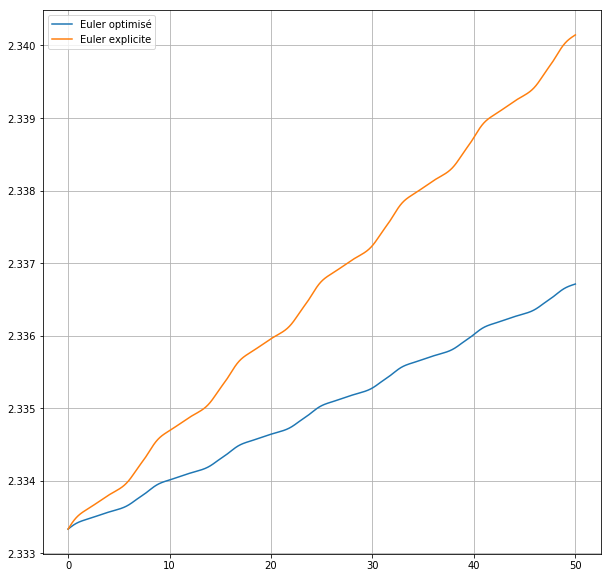

In [22]:
T, X = solve_ivp_euler_explicit_variable_step(f, (1, 1), 0, 50)
Te, Xe = solve_euler_explicit(f, (1, 1), 1e-3, 0, 50)
X1, X2 = X[:,0], X[:,1]
X1e, X2e = Xe[:,0], Xe[:,1]
plt.plot(T, H(X1,X2), label="Euler optimisé")
plt.plot(Te, H(X1e,X2e), label="Euler explicite")
plt.legend()
plt.grid()
plt.show()